Lab Assignment 3 Part 1 Members 

1. Darren Ang <br>
2. Harsh Kagda <br>
3. Jonathan Hilton <br>
4. Keith Wertsching <br>
5. Nicole Yoon


## Introduction

What would happen if laws were erased and all crime became legal? One would assume that human beings would still have enough innate compassion to avoid killing each other, but many cases in history have demonstrated humanity's ability to act purely out of emotion and completely disregard social norms.  But is it the simple fact that certain actions are against the law that deter citizens from committing crimes, or is another layer of implication necessary to deter people from heinous actions? Modern research tends to agree with the latter idea, that the certainty and severity of punishment are critical to detering people from a life of crime.  Our research sets out to answer the question: "To what extent does the probability of getting caught and the severity of the punishment reduce the crime rate in the North Carolina counties that have the highest percentage mix of face to face crimes?"

The result of our analysis is going to demonstrate the potential effectiveness of two policies that are central to our campaign's crime reduction initiative:

1. Empowering police officers to build a network of citizens in their community who can help the officers find those responsible for committing crimes and increasing the probability that the perpetrators will be arrested.
2. Harshening the punishments for repeat offenders by increasing the average sentences they receive in an effort to deter criminals from continuing to break the law.

## Initial Data Loading and Cleaning

The data is comprised of 25 metrics gathered for 91 counties from the state of North Carolina. Upon import, we noticed that there were 97 rows instead of the expected 91.  Looking further into, the dataset had 6 extra rows that were all NA values. We removed these rows to create a subset of data that only included the 91 relevant datapoints.

In [1]:
library(car)
library(lmtest)
library(sandwich)
#library(stargazer)

df = read.csv('crime_v2.csv')
str(df)
summary(df)
sum(is.na(df))
nrow(df)
df = na.omit(df)
sum(is.na(df))
nrow(df)
summary(df$su)

Loading required package: carData
Loading required package: zoo

Attaching package: 'zoo'

The following objects are masked from 'package:base':

    as.Date, as.Date.numeric



'data.frame':	97 obs. of  25 variables:
 $ county  : int  1 3 5 7 9 11 13 15 17 19 ...
 $ year    : int  87 87 87 87 87 87 87 87 87 87 ...
 $ crmrte  : num  0.0356 0.0153 0.013 0.0268 0.0106 ...
 $ prbarr  : num  0.298 0.132 0.444 0.365 0.518 ...
 $ prbconv : Factor w/ 92 levels "","`","0.068376102",..: 63 89 13 62 52 3 59 78 42 86 ...
 $ prbpris : num  0.436 0.45 0.6 0.435 0.443 ...
 $ avgsen  : num  6.71 6.35 6.76 7.14 8.22 ...
 $ polpc   : num  0.001828 0.000746 0.001234 0.00153 0.00086 ...
 $ density : num  2.423 1.046 0.413 0.492 0.547 ...
 $ taxpc   : num  31 26.9 34.8 42.9 28.1 ...
 $ west    : int  0 0 1 0 1 1 0 0 0 0 ...
 $ central : int  1 1 0 1 0 0 0 0 0 0 ...
 $ urban   : int  0 0 0 0 0 0 0 0 0 0 ...
 $ pctmin80: num  20.22 7.92 3.16 47.92 1.8 ...
 $ wcon    : num  281 255 227 375 292 ...
 $ wtuc    : num  409 376 372 398 377 ...
 $ wtrd    : num  221 196 229 191 207 ...
 $ wfir    : num  453 259 306 281 289 ...
 $ wser    : num  274 192 210 257 215 ...
 $ wmfg    : num  33

     county           year        crmrte             prbarr       
 Min.   :  1.0   Min.   :87   Min.   :0.005533   Min.   :0.09277  
 1st Qu.: 52.0   1st Qu.:87   1st Qu.:0.020927   1st Qu.:0.20568  
 Median :105.0   Median :87   Median :0.029986   Median :0.27095  
 Mean   :101.6   Mean   :87   Mean   :0.033400   Mean   :0.29492  
 3rd Qu.:152.0   3rd Qu.:87   3rd Qu.:0.039642   3rd Qu.:0.34438  
 Max.   :197.0   Max.   :87   Max.   :0.098966   Max.   :1.09091  
 NA's   :6       NA's   :6    NA's   :6          NA's   :6        
        prbconv      prbpris           avgsen           polpc         
            : 5   Min.   :0.1500   Min.   : 5.380   Min.   :0.000746  
 0.588859022: 2   1st Qu.:0.3648   1st Qu.: 7.340   1st Qu.:0.001231  
 `          : 1   Median :0.4234   Median : 9.100   Median :0.001485  
 0.068376102: 1   Mean   :0.4108   Mean   : 9.647   Mean   :0.001702  
 0.140350997: 1   3rd Qu.:0.4568   3rd Qu.:11.420   3rd Qu.:0.001877  
 0.154451996: 1   Max.   :0.6000   Max

[1] 144

[1] 97

[1] 0

[1] 91

Length  Class   Mode 
     0   NULL   NULL 

## Model Building Process: Selecting Variables for all three models

Based on our research question, we selected crime rate (crmrte) as our dependent variable. For our analysis, we are assuming that face to face crimes are more likely to be violent crimes.  In order to generate results that would make a strong campaign message, we decided to have our analysis focus on the top half of counties that had a higher mix of face to face crimes. A sample size of 46 is not ideal, but it is large enough for us to move forward without any clear violations of CLM Assumptions based on sample size.


It is important to note that we are doing a log - log comparison for the dependent variable and the independent variables. We feel that our analysis will provide stronger results by showing how a percentage change in one of the independent variables will cause a percentage change in crime rate.  The log - log comparison will allow us to compare across our variables without having to explain the units and range of each independent variable.


Our base model needs to address the idea of crime and punishment, both the probability of getting caught and the punishment associated with getting caught.  For the probability of getting caught, we going to use probability of arrest (prbarr).  For the punishment associated with getting caught, we are going to use the probability of conviction (prbconv) and the average sentence (avgsen).

Looking at these variables, we discovered that we needed to convert the probability of conviction to a numeric value (we are calling it prbconv2), which will allow us to perform further analysis on it.  In terms of outliers, we did find a clear outlier on the probability of arrest, which measures that likelihood that someone will be arrested after they have committed a crime. This metric should logically never exceed 100%, which is the circumstance where every crime committed is met with an arrest. We decided to omit the county that had above 100% probability of arrest in order to avoid contaminating our results. Looking at the other variables, we did not find anything that would bias our results.  For the variables in our base model, we see no evidence that would indicate a non-linear relationship with crime rate.  


For model 2, we are keeping the same variables from the base model, and holding administrative characteristics constant. The administrative characteristics include police per capita (polpc) and tax revenue per capita (taxpc).  Keeping these two characteristics constant allows us to remove the potentially biasing factor of one counties justice system having more resources than another, which will enable us to focus specifically on how changing the probability of getting caught (probability of arrest) and the punishment associate with getting caught (probability of conviction and average sentence) will change the crime rate.

Looking at these variables for outliers, we found that tax revenue per capita had a mean of 38.06 and a max of 119.76. Considering that the next highest value was 75.76, we decided to not include the county that had the outlier value on Tax Revenue per capita and assume that the value was collected or reported in error.  Removing this county allows us to mitigate the potential bias from poor data collection or reporting standards.

For the administrative variables, we see no evidence that would indicate a non-linear relationship with crime rate.

For model 3, we are examining the same punishment variables as the base model, holding the administrative characteristics from model 2 constant, and holding three demographic characteristics constant to help eliminate the potential bias that may arise from the group of people being different from one county to another.  Holding the percentage minority (pctmin80), percentage young male (pctymle), and population density (density) constant allows us to better examine the relationship between punishment and crime rate without having to worry about people from different demographics behaving in different ways.  Looking at these variables, we do not see any evidence of outliers or any evidence that a non-linear relationship with crime rate exists.

For the purpose of our analysis, we are not including county, year, probability of prison sentence (prbpris), urban indicator (urban), west indicator (west), central indicator (central), and weekly wage across different industries (wcon, wtuc, wtrd, wfir, wser, wmfg, wfed, wsta, wloc).  Because we are not including any of these variables in our models, we are not examining them for outliers or for non-linear relationship with crime rate.

In [2]:
#Need to convert conviction rate into numerics
df$prbconv2 = as.numeric(df$prbconv)

# Removed removed prbarr above 1, remove outlier on taxpc)
df = subset(df, prbarr < 1 & taxpc <100 & mix >= 0.10186)
nrow(df)
summary(df)

#These scatterplots were used to look for outliers and do an initial check for non-linear relationships

#Model 1
#scatterplotMatrix(~crmrte + prbarr + prbconv2 + avgsen, data = df, diagonal = list(method = "histogram"))

#Model 2
#scatterplotMatrix(~crmrte + prbarr + prbconv2 + avgsen + polpc + taxpc, data = df, diagonal = list(method = "histogram"))

#Model 3
#scatterplotMatrix(~crmrte + prbarr + prbconv2 + avgsen + polpc + taxpc + density + pctmin80 + pctymle, data = df, diagonal = list(method = "histogram"))

[1] 46

     county           year        crmrte            prbarr      
 Min.   :  5.0   Min.   :87   Min.   :0.01192   Min.   :0.1461  
 1st Qu.: 53.0   1st Qu.:87   1st Qu.:0.02060   1st Qu.:0.2548  
 Median :113.0   Median :87   Median :0.03000   Median :0.3144  
 Mean   :105.4   Mean   :87   Mean   :0.03279   Mean   :0.3264  
 3rd Qu.:156.5   3rd Qu.:87   3rd Qu.:0.03718   3rd Qu.:0.3804  
 Max.   :195.0   Max.   :87   Max.   :0.09897   Max.   :0.6890  
                                                                
        prbconv      prbpris           avgsen           polpc          
 0.588859022: 2   Min.   :0.1500   Min.   : 5.450   Min.   :0.0007559  
 0.068376102: 1   1st Qu.:0.3781   1st Qu.: 7.312   1st Qu.:0.0012378  
 0.203724995: 1   Median :0.4274   Median : 8.795   Median :0.0014483  
 0.226361006: 1   Mean   :0.4149   Mean   : 9.331   Mean   :0.0016275  
 0.229589999: 1   3rd Qu.:0.4576   3rd Qu.:11.098   3rd Qu.:0.0018610  
 0.248275995: 1   Max.   :0.6000   Max.   :14.62

## Model Building Process: Analyzing CLM Assumptions 1 and 2

### 1 Linear Population Model
Based on our initial exploratory data analysis, we did not find any evidence that would suggest a non-linear relationship between crime rate and any of the variables we selected in all three models.  For each model, we will do a more in depth analysis on each variable that is net new to the model, and we will call out any non-linear relationships that we see between these independent variables and crime rate.  Additionally, since we do not constrain the error term, we can assume there is some linear relationship between the variables provided by inspecting of the results of the models.  

### 2 Random Sampling
Data was collected on 91 out of 100 North Carolina counties.  Based on the background of the study, we see no evidence that would suggest any bias was present in the sampling methods. Therefore, we will move forward with the assumption that the random sampling CLM assumption was not violated.

## Regression Model 1
As described above, we are focused on crime and punishment in this model. As stated above, our model is:

$log(crime rate) = \beta_0 \ + \ \beta_1 log(probability \ of \ arrest) \ + \ \beta_2 log(probability \ of \ conviction) \ + \ \beta_3 log(average \ sentence) $

To further analyze this model we will conduct an EDA of the variables, assess if CLM assumptions #3-6 are valid and adjust our model if needed, and finally analyze the results of our model including the statistical significance of the results.

## EDA of Model 1 Variables
We will look at the variables prbarr (probability of arrest), prbconv2 (probability of conviction), and avgsen (average sentence).

### EDA #1 prbarr (Probability of Arrest)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
 0.1461  0.2548  0.3144  0.3264  0.3804  0.6890 

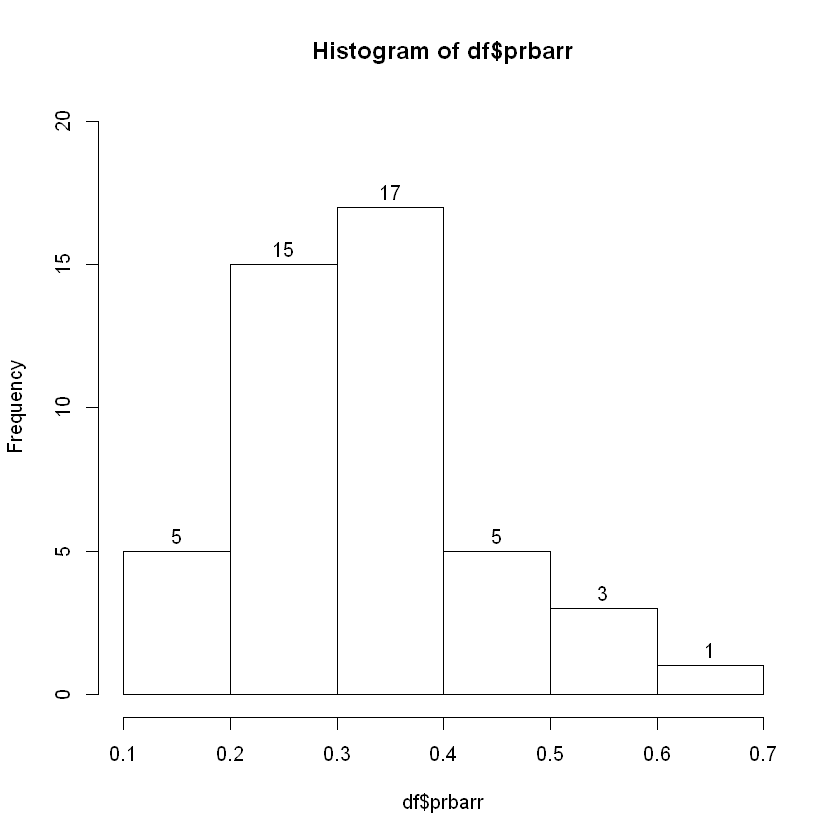

In [3]:
hist(df$prbarr, ylim = c(0, 20), labels = TRUE)
options(repr.plot.width=10, repr.plot.height=6)
summary(df$prbarr)

By inspection this variable does not appear to not have a major skew or major outliers with a min of 14.6% and a max of 68.9%.  While the max does seem high, I do not have sufficient evidence to dismiss it out of hand.  This variable is also a percentage and the values make sense for their range.  We will now take a look at the plot of crime rate (crmrte) to probability of arrest (prbarr)

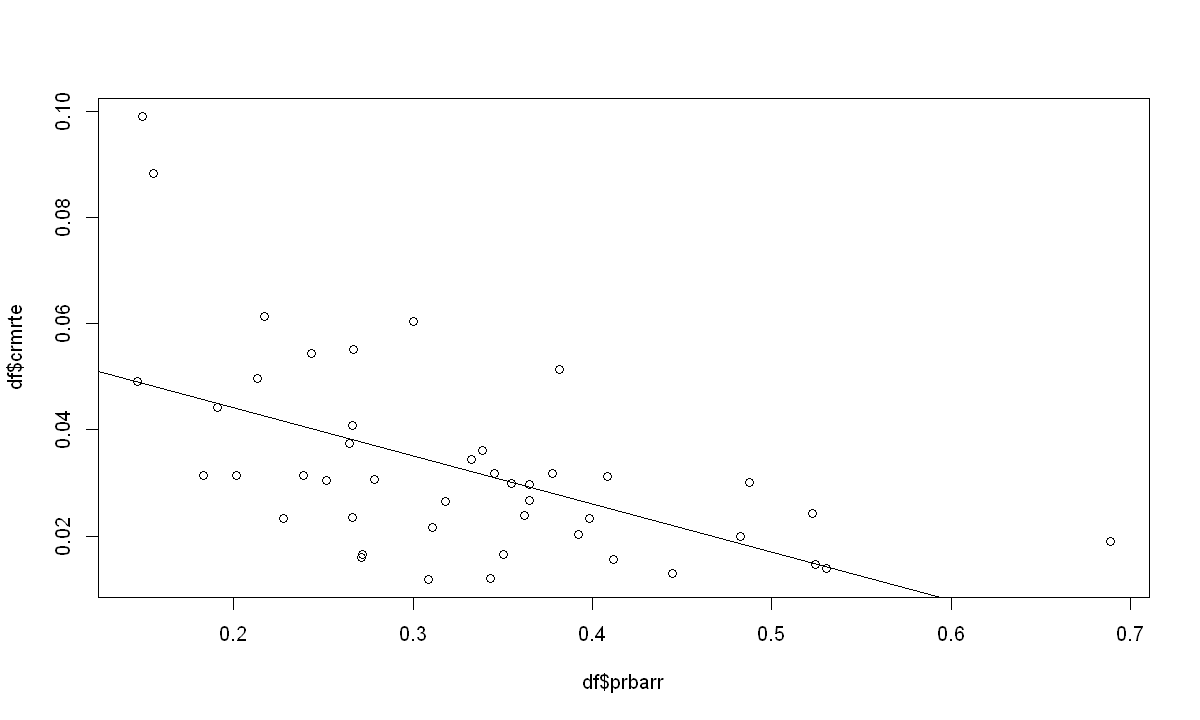

In [4]:
plot(df$prbarr, df$crmrte)
abline(lm(df$crmrte~df$prbarr))

There is evidence of a negative relationship between crime rate and the probability of arrest.  However, we will reserve further analysis until later in the regression analysis.

### EDA #2 prbconv2 (Probability of Conviction)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
   3.00   19.25   41.00   42.78   65.50   91.00 

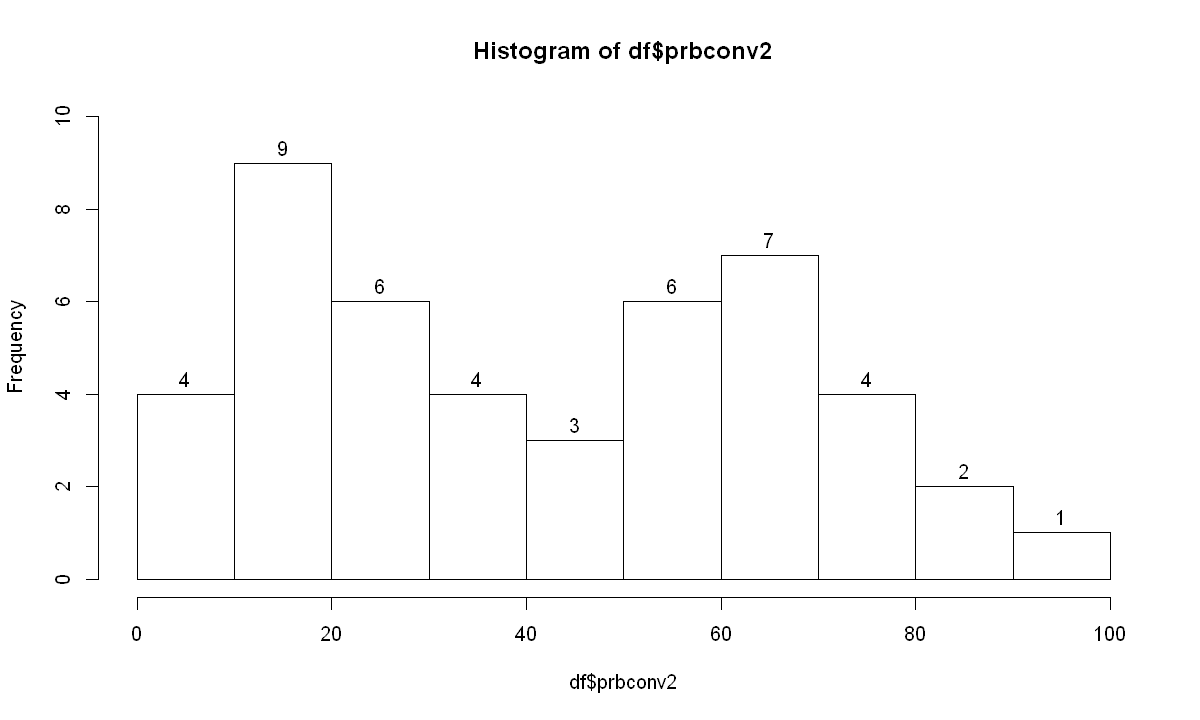

In [5]:
hist(df$prbconv2, ylim = c(0,10), labels = TRUE)
summary(df$prbconv2)

The values of prbconv2 seem to have a good spread with higher concentrations at 20% and 70%.  The max value of 91% seems high but within an acceptable value as a percentage.  The same as above, there is nothing here that would cause us to remove outliers or not accept the values as part of this analysis.

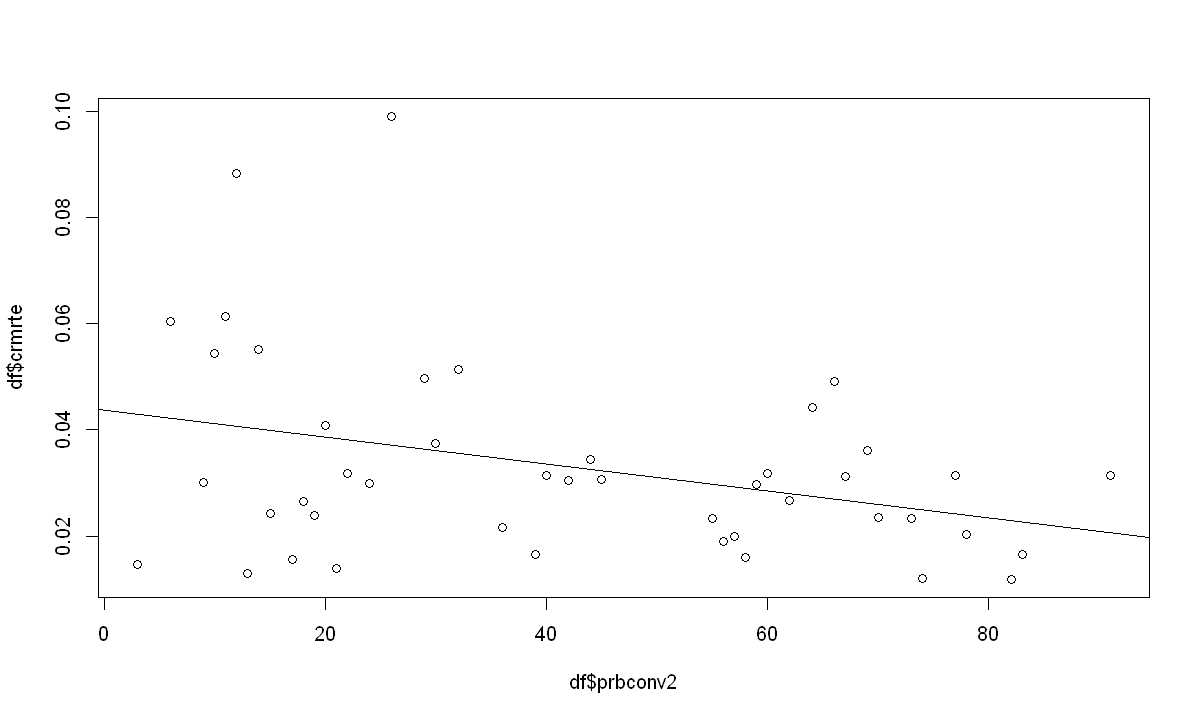

In [6]:
plot(df$prbconv2, df$crmrte)
abline(lm(df$crmrte~df$prbconv2))

While not as strong as prbarr, the prbconv2 variable does seem to have a slight negative relationship to crime rate.

### EDA #3 avgsen

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  5.450   7.312   8.795   9.331  11.098  14.620 

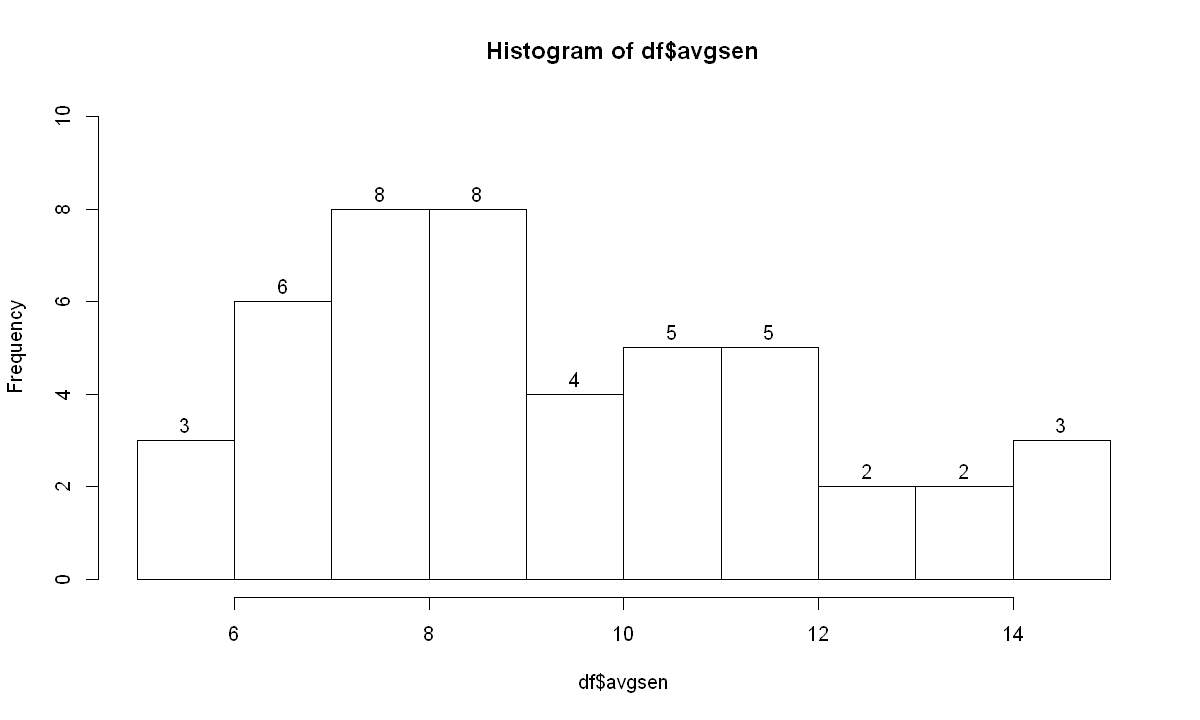

In [7]:
hist(df$avgsen, ylim = c(0,10), labels = TRUE)
summary(df$avgsen)

Considering average sentence is in number of days this distribution also seems to fit into reasonable parameters without significant skew or significant outliers.  While not a normal distribution, it does seem to have higher concentration around the 8 day or perhaps 1 week mark.

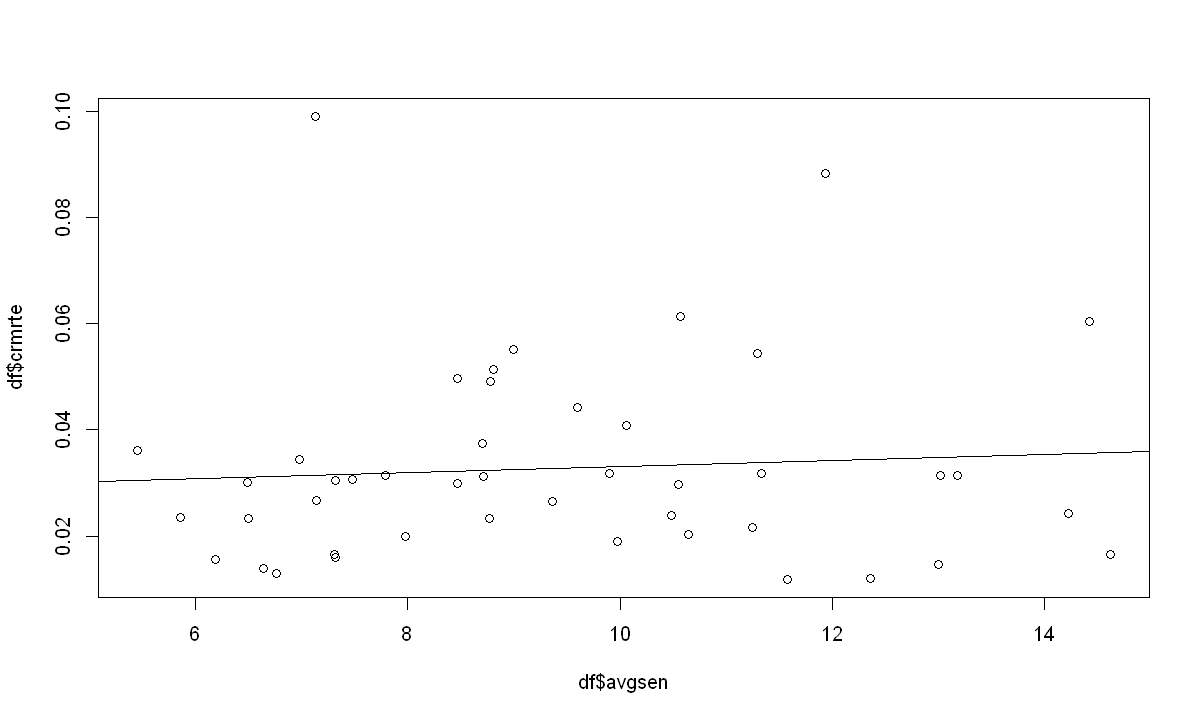

In [8]:
plot(df$avgsen, df$crmrte)
abline(lm(df$crmrte~df$avgsen))

A slight relationship between avgsen and crmrte does appear but it does not seem to be a strong one. There are 2 values at the further end of avgsen which appear to pull the line up around 12 weeks and 15 weeks.  A single data point with a  high crime rate around 7 weeks also seems to affect the line as well.  We will need to see more when our model is fully developed and analyzed later.  

## Model #1 CLM Assumptions 3-6
Let's now take a look at our CLM assumptions #3-6 for this model which are:
3.  No perfect multicollinearity
4.  Zero-conditional mean
5.  Homoskedasticity
6.  Normality of Errors

### Model 1 CLM #3 - No perfect multicollinearity
Prior to moving into each CLM I will assume the model with no log transformations as stated in the model building process.

In [9]:
model1a = lm(crmrte ~ prbarr + prbconv2 + avgsen, data = df)
paste("Variance Inflation Factor form Model 1 (untransformed)")
vif (model1a)

[1] "Variance Inflation Factor form Model 1 (untransformed)"

prbarr prbconv2   avgsen 
1.035484 1.040423 1.005345

Since R did not alert us to any issues with the model and the VIF test shows all variables with a a VIF around we know that we do not have perfect collinearity and in fact we have low collinearity in general.

### Model 1 CLM #4 - Zero Conditional Mean
We will examine the Residuals vs Fitted plot for this assessment.  Again, we will use our nontransformed model first.

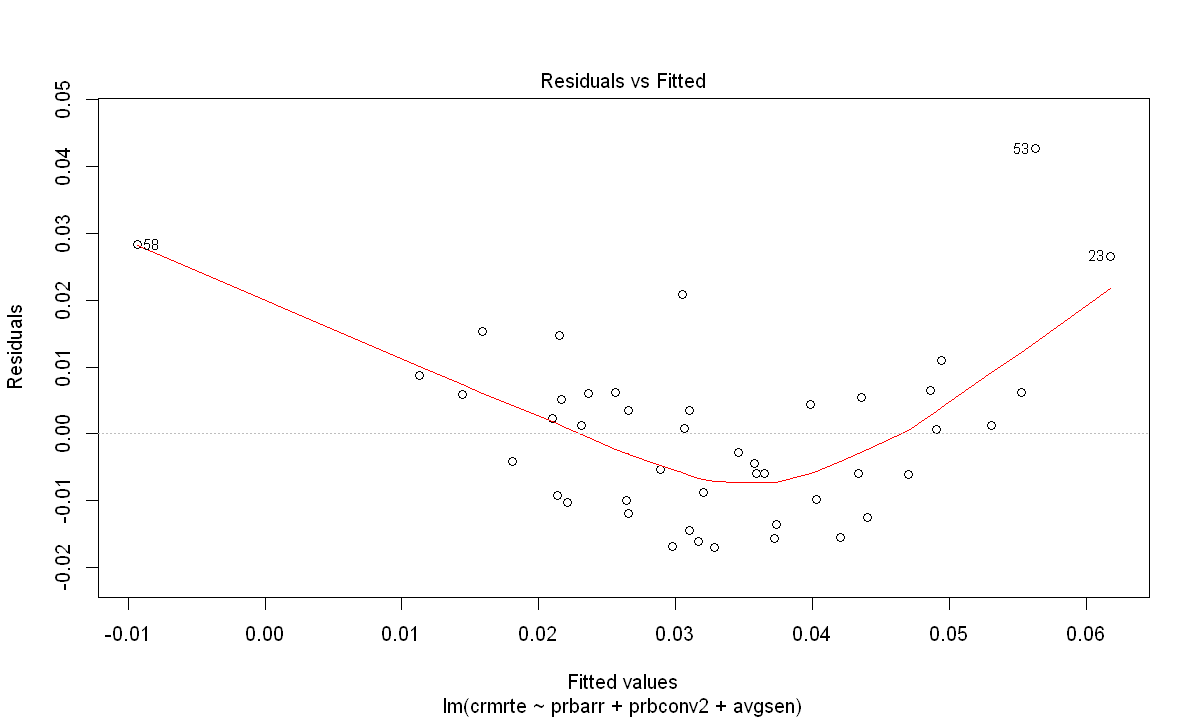

In [10]:
plot(model1a, which =1)

Initial inspection leads us to believe that we do not have a a strong case for zero conditional mean.  However, we do see that values 58, 53, & 23 may be influencing our curve on each end.  Let's examine if our log transformation helps recitfy this issue.

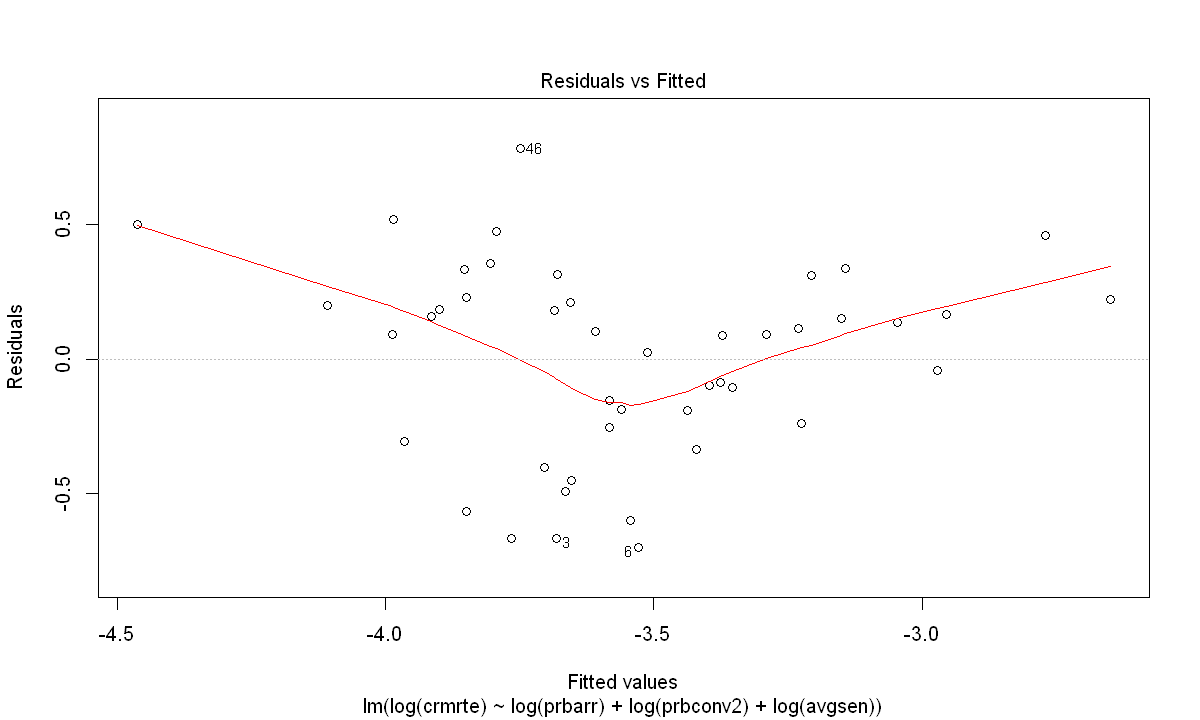

In [11]:
model1 = lm(log(crmrte) ~ log(prbarr) + log(prbconv2) + log(avgsen), data = df)
plot(model1, which=1)

While we see some similar trends, the log transformation does seem to help us to lessen the impact of the height of the line at the ends.  Since the line stays within close proximity to 0 for the vast majority of lines, we will keep our zero conditional mean assumption with this log transformation.

### CLM #5 Homoskedacity
We will now examine our log transformed model for Homoskedacity using a Scale-Location plot.

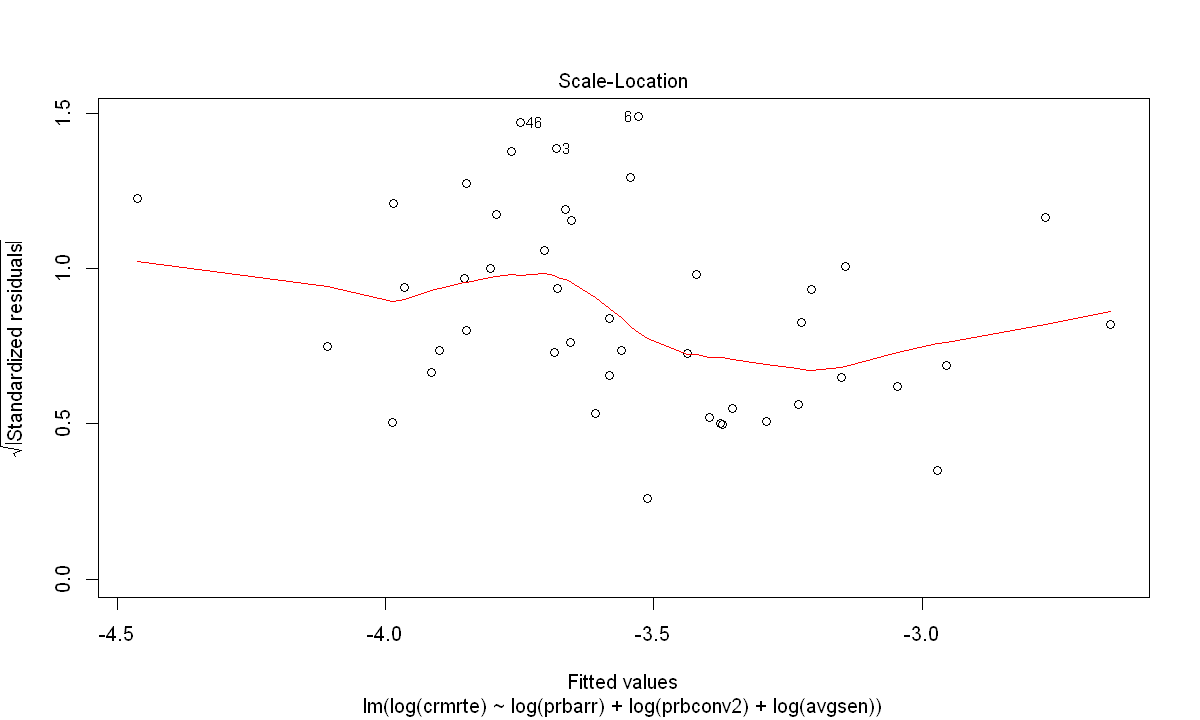

In [12]:
plot(model1, which=3)

While this is not a bad plot for homoskedacity, we still have evidence of heteroskedacity.  We can account for this with a conservative approach and utlize robust standard erros.  From this point forward, we will utilize the (vcov = vcovHC) to leverage the robust standard errors.

### CLM #6 Normality of Errors
To examine this assumption we will look at our the Normal Q-Q plot to see how our residuals fit as well as the histogram of our residuals in our model.

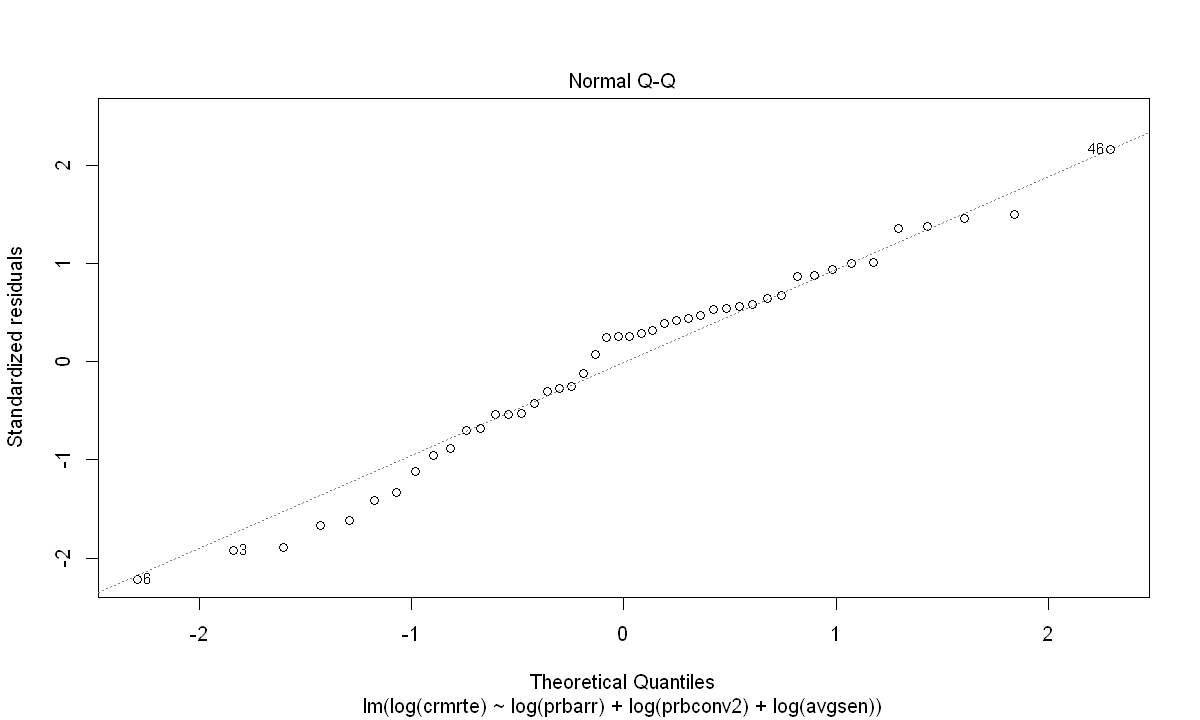

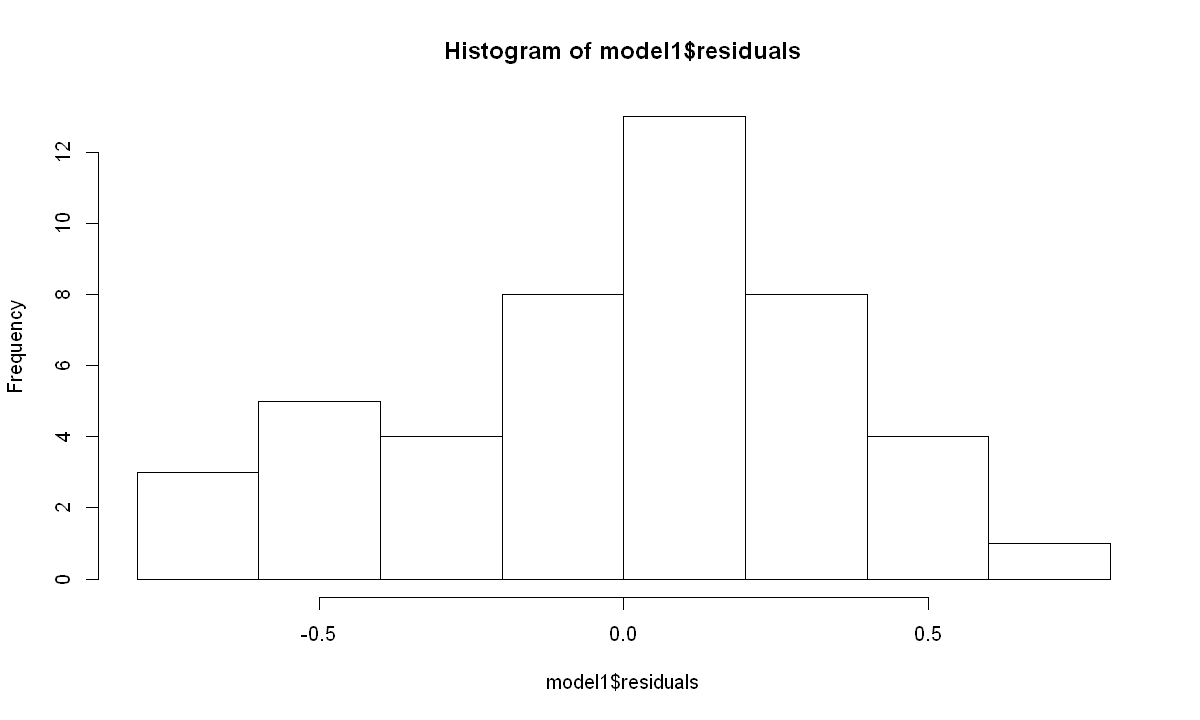

In [13]:
plot(model1, which=2)
hist(model1$residuals)

The QQ plot does not have a perfect fit to the line, meaning absolute normality of error does not exist in this sample.  However, the residuals did not have a strongly skewed distribution.  Again, the histogram does not show normaility especially because of some higher concentrations around -0.5.  At the same time, the general shape of the histogram and with a sampling size of n=46, we will invoke the Central Limit Theorem with an n>30 and keep our assumption on normality of error.

### Residuals vs Leverage Check
While not part of our assumptions we can also look at the plot of Residuals vs Leverage to see if any single data points are driving our model.

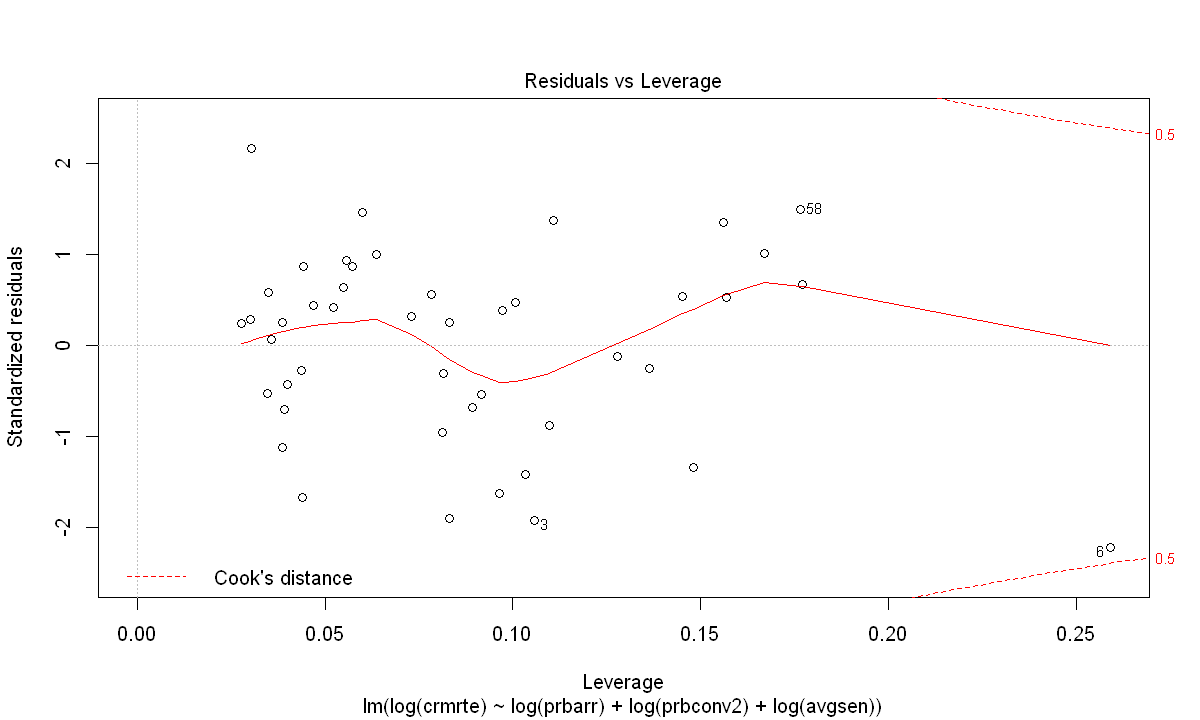

In [14]:
plot(model1, which=5)

No standard residuals from our data points are driving our model, however we will not that data point 6 is close to the Cook's distance of 0.5.

## Regression Tables
Now that we have conducted our EDA, checked our CLM assumptions #3-6, and conducted a transformation, we can now move into the results of our model and analyze their meaning.

In [15]:
model1 = lm(log(crmrte) ~ log(prbarr) + log(prbconv2) + log(avgsen), data = df)

stargazer(model1, type = 'text', report = 'vc', title = "% Change in Crime Rate vs % Change in Prob of Arrest & Police per Capita",
         keep.stat = c('n', 'rsq'), omit.table.layout = 'n')
paste("t and p values with robust standard errors")
coeftest(model1, vcov = vcovHC)

ERROR: Error in stargazer(model1, type = "text", report = "vc", title = "% Change in Crime Rate vs % Change in Prob of Arrest & Police per Capita", : could not find function "stargazer"


## Model 1 Analysis
This model appeared to have a strong assocation of decline in the crime rate based on increasing probability of arrests, probability of conviction and average sentecing.  The coefficeints of $\beta_1 \ = \ -.983$ for probability of arrest and $\beta_2 \ = \ -.231$ for probability of conviction and $\beta_3 \ = \ -.035$ suggest a strong association.  Furthermore, the $R^2 \ = \ .507$ seems to suggest that these variables account for a little more than 50% of the percent change in the crime rate. In terms of the social sciences, we can consider this value to be strong.  With the log - log transformation we can say that a 1% change in the unit rate of each of our independent variables will account for the $\beta_i$ % change in the unit rate of the dependent variable.  For example, we can say that this model suggests that a 1% increase in the probablity of arrest is associated with a -0.98% change in the crime rate. 

### Statistical and Practical Signficance
While we had good correlation in our model, we find that we only have statistical significance in prbarr and prbconv2.  The p-values for each of those variables was less than .05 while the avgsen had a high p-value well above .05.  This indicates that the we cannot reject a null hypthoses that $H_0: \ \beta_3 \ = \ 0$, meaning that avgsen is not stastically significant.  In terms of practical significance, this seems practical in that a county could in fact raise arrest rates and conviction rates just 1% to see a 1% decrease in the crime rate.

This starts to help form our conculusion on the policy reccomendations we might make by focusing on crime and punishment in these counties with higher face to face crime.

At the same time, we do want to know what happens in our model with the addition of other covariates, especially if we want to hold other variables constant in our analysis.  This will lead us to Model #2 where we want to hold administrative commitments and costs constant.

## Model 2 Analysis

In model 2, we included two additional variables which we believe will increase the accuracy of our results. We have included average sentence (avgsen) and 'probability of conviction (prbconv).

So our model 2 will be - 

𝑙𝑜𝑔(𝑐𝑟𝑖𝑚𝑒𝑟𝑎𝑡𝑒)= 𝛽0  + 𝛽1𝑙𝑜𝑔(𝑝𝑟𝑜𝑏𝑎𝑏𝑖𝑙𝑖𝑡𝑦 𝑜𝑓 𝑎𝑟𝑟𝑒𝑠𝑡) + 𝛽2𝑙𝑜𝑔(𝑝𝑜𝑙𝑖𝑐𝑒 𝑝𝑒𝑟 𝑐𝑎𝑝𝑖𝑡𝑎) + 𝛽3𝑙𝑜𝑔(average sentence) + 𝛽2𝑙𝑜𝑔(𝑝robability of conviction)

<br>

This model appeared to have a strong assocation of decline in the crime rate based on increasing probability of arrests, police per capita, average sentence and probability of conviction.  The coefficeints of $\beta_1 \ = \ -.88$ for probability of arrest, $\beta_2 \ = \ .23$ for police per capita and $\beta_3 \ = \ .25$  for average sentence days suggest a strong association.  Furthermore, the $R^2 \ = \ .497$ seems to suggest that these variables account for close to 50% of the percent change in the crime rate. 𝑅2  has increased from Model 1 but this can be attributed to addition of two more variables.

Also, these coefficients continue to confirm our thinking that if police per capita is ommitted, it would over-estimate probability of arrest on moving crime rate closer to 0. Continuing from Model 1, this helps our conculusion on the policy reccomendations we might make regarding crime and arrests which we will address in the conclusion.

We will also add additional variables to understand if any other variables help us understand better on our output variable. In Model 3, we will add few more variables which will help us solidify our conclusion.



In [ ]:
model2 = lm(log(crmrte) ~ log(prbarr) + log(prbconv2) + log(avgsen)+ log(polpc)+log(taxpc), data = df)

summary(model2)$r.square

In [ ]:
#Checking for CLM assumptions. 
plot(model2)
hist(model2$residuals)
shapiro.test(model2$residuals)
coeftest(model2, vcov = vcovHC)
vcovHC(model2)
# % increase in probability arrest is associated with 0.88% decline in crime rate.

##### Discussion of CLM Assumption analysis for Model 2
- Zero Conditional Mean: Looking at the Residuals vs. Fitted value, the values are centered fairly close to 0 throughout the x-value except at the extreme values of X.
- Homoskedasticity: We can also see in the Residuals vs Fitted value plot that the the variance is larger for smaller x-value, thus indicating heteroskedasticity. In addition, we can also reject the null hypothesis that the residuals is normally distributed by looking at the p-value < 0.05 in the Shapiro test.
- Normality of errors: Looking at the Normal Q-Q plot, our residuals do not closely follow the diagonal line entirely. This indicates that normality assumption of errors is also violated. Due to the size of our observation, we should note that we will not be able to rely on OLS asymptotic assumption and may need to consider correcting for this. 
- Leverage & Influence: Due to small sample size, many observations have high leverage. Also, we see that there is a single observation falling outside the 0.5 dotted line which signals potential for strong influence. 

## Regression Table

In [ ]:
library('stargazer')

model1 = lm(log(crmrte) ~ log(prbarr)+ log(prbconv2) + log(avgsen), data = df)

stargazer(model1, model2, type = 'text', report = 'vc', title = "% Change in Crime Rate vs % Change in Prob of Arrest , % Change in Police per Capita, % Change in average sentence days & % Change in probability of conviction",
         keep.stat = c('n', 'rsq'), omit.table.layout = 'n')
#scatterplot(log(crmrte) ~ log(prbarr) + log(polpc) + log(avgsen) + log(prbconv2)), data = df, ylab = "% Change in Crime Rate", xlab = "% Change in Probability of Arrest and Average Sentence", main = "Regression Model 1:  
#% Change in Crime Rate vs % Change in Probability of Arrest and Average Sentence
#(Counties with Higher than Avg Face - To - Face Crimes)")

## Regression Model 3
For Model 3, we included density, percent of young male and percent of minority as additional covariates to analyze whether our initial assumptions regarding severity of punishment continue to hold true while holding variables from the dataset that define the demographic composition of the county and density constant.

Our Model 3 is:

$log(crime rate) = \beta_0 \ + \ \beta_1 log(probability \ of \ arrest) \ + \ \beta_2 log(probability \ of \ conviction) \ + \ \beta_3 log(average \ sentence) + \ \beta_4 log(police \ per \ capita) \ + \ \beta_5 log(tax \ per \ capita) \ + \ \beta_6 log(density) + \ \beta_7 log(percent \ of \ young \ male) \ + \ \beta_8 log(percent \ of \ minority) \ $


## EDA of Model 3 Variables
We will look at the variables 1) density, 2)percent of young male and 3)percent of minority.

### EDA #1 Density (people per sq. mile)

In [ ]:
hist(df$density, ylim = c(0, 30), labels = TRUE)
options(repr.plot.width=8, repr.plot.height=8)
summary(df$density)

Looking at the histogram, we are able to see that the over 75% of our sample has density less than 2 and there the data is heavily skewed to the right. It is in line with our expectation that there will be a few high density urban counties surrounded by less dense suburban and rural counties. No extreme outlier is observed that leads us to question further on data quality of this variable.


In [ ]:
plot(df$density, df$crmrte)
options(repr.plot.width=5, repr.plot.height=5)
abline(lm(df$crmrte~df$density))

There is very strong positive correlation between density and crime rate. However we also noted that the number of samples for more extreme values (e.g. counties with density greater than 2 people per sq.mile and crime rate over 0.06) is very small and will look closer for potential influence in our later analysis.  Density will be added to our model to determine whether severity of punishment is still negatively correlated with crime rate when adjusting for how crowded the county is.




### EDA 2 Pctymle (Percent young male)

In [ ]:
hist(df$pctymle, ylim = c(0, 30), labels = TRUE)
options(repr.plot.width=5, repr.plot.height=5)
summary(df$pctymle)

Based on the histogram, most (42 out of 46) counties have percent young male less than 10%. This graph is also heavily skewed to the right. We hypothesized that the outlier county with ~25% young male may be a college town where we would expect to see much higher concentration of young demographic.  However, this does not warrant this outlier observation to be removed from the regression dataset.

In [ ]:
plot(df$pctymle, df$crmrte)
options(repr.plot.width=5, repr.plot.height=5)
abline(lm(df$crmrte~df$pctymle))

Here, we also see positive correlation between percent young male and crime rate as expected.  Especially because we've limited our observations to counties with greater than average(median) face to face offense mix, it is plausible that higher percentage of young male is positively correlates with the county crime rate. Percent young male will be added to our model to determine whether severity of punishment is still negatively correlated with crime rate when adjusting for demographic mix looking specifically at young male.


### EDA 3 pctmin80 (Percent minority in 1980)

In [ ]:
hist(df$pctmin80, ylim = c(0, 12), labels = TRUE)

summary(df$pctmin80)

Compared to above two covariates, percent of minority(in 1980) is less skewed to the right. There are only 4 counties with percent minority greater than 50% and by definition, was in line with expecation. As with any state or major city, there will be few selected areas with higher concentration of minority population, but we would expect to find this metric to be lower than 50% for most data points. We did not note any data quality issues with this dataset (e.g. perecent minority > 100)

In [ ]:
plot(df$pctmin80, df$crmrte)
options(repr.plot.width=5, repr.plot.height=5)
abline(lm(df$crmrte~df$pctmin80))

We continue to observe positive correlation with crime rate, although for percent minority, it is not as obvious. 
Percent minority will be added to our model to determine whether severity of punishment is still negatively correlated with crime rate when adjusting for minority mix.



## Model #3 CLM Assumptions 3-6


### Model 3 CLM #3 - No perfect multicollinearity


In [ ]:
model3 = lm(log(crmrte) ~ log(prbarr) + log(prbconv2) + log(avgsen)+ log(polpc) + log(taxpc)+ log(density) + log(pctymle)+log(pctmin80), data = df)
paste("Variance Inflation Factor form Model 1 (untransformed)")
vif (model3)

There is no perfect multicollinearity between the variable included in the regression.

### Model 3 CLM #4 - Zero conditional mean

In [ ]:
plot(model3, which =1)
#plot(model3a, which = 1)

Looking at the Residuals vs. Fitted value, the values are centered fairly close to 0 throughout the x-value, with a few noticeable outliers at the bottom of the graph. However, we are not able to identify any pattern in the residuals and determined that the model meets teh zero conditional mean assumption.

### Model 3 CLM #5 - Homoskedasticity

In [ ]:
plot(model3, which = 3)
options(repr.plot.width=5, repr.plot.height=5)
#plot(model3a, which = 3)

Looking at above Scale-Location plot, we observe random and fairly even spread of residuals, and have determined that our model may assume homoscedasticity.

### Model 3 CLM #6 - Normality of error

In [ ]:
plot(model3, which = 2)
#plot(model3a,which = 2)

Looking at the Normal Q-Q plot, our residuals do not closely follow the diagonal line, especially in the lower theoretical quantiles and does not show normality. However, we see that in below histogram that the residuals are not strongly skewed and loosely resemble normal distribution and with a sampling size of n=46, we will invoke the Central Limit Theorem (n>30) and maintain our assumption on normality of error. 

In [ ]:
hist(model3$residuals)
#hist(model3a$residuals)


### Leverage & Influence: 

We anticipate that due to small sample size(n=46), certain observations may have high leverage. Below, we see that there are two observations(Cook's distance > 0.5) that signal potential for strong influence. However, we will not remove these observations from our dataset automatically and allow our model to be flexible. 

In [16]:
plot(model3, which = 5)
#df
#dfa = subset(df, (county != 173 & county != 195)) #subset dataset to exclude 2 high influence samples
#dfa
#model3a = lm(log(crmrte) ~ log(prbarr) + log(prbconv2) + log(avgsen)+ log(polpc) + log(taxpc)+ log(density) + log(pctymle)+log(pctmin80), data = dfa)
#plot(model3a, which = 5)

ERROR: Error in plot(model3, which = 5): object 'model3' not found


## Regression Table


In [ ]:
#fitting the linear model of model3
library(stargazer)

stargazer(model1, model2, model3, type = 'text', report = 'vc', title = "Model comparison: % Change in Crime Rate", column.labels = c('Base Model', 'Model 2', 'Model 3'),
         dep.var.labels = '% Change in Crime Rate',  covariate.labels = c('probability of arrest', 'probability of conviction', 'average sentence days', 'police per capita', 
                                                                         'tax per capita', 'density', 'percent of young male', 'percent of minority' ), keep.stat = c('n', 'rsq',"adj.rsq"), omit.table.layout = 'n')

paste('t and p values with robust standard errors')
coeftest(model3, vcov = vcovHC)
#(se.model3 = sqrt(diag(vcovHC(model3))))

## Model 3 Analysis

We included below list of covaritates in addition to the features included in our model 2 (1. probability of arrest, 2. police per capita, 3. average sentence days and 4. probability of conviction).
-  density
-  percent young male (pctymle)
-  percent minority, 1980 (pctmin80)

This model still demonstrates to have a strong assocation of decline in the crime rate based on increasing probability of arrests, probability of conviction and average sentecing. The coefficeints of  𝛽1 = −.601  for probability of arrest and  𝛽2 = −.164  for probability of conviction and  𝛽3 = −.257  suggest a strong association. Furthermore, the increase in 𝑅2 = .82  suggests that these variables account for 82% of the percent change in the crime rate although we also understand that by introducing additional 5 covariates to the base model, we naturally expect increase in 𝑅2 .  Consistent with earlier model analysis, With the log - log transformation, a 1% change in the unit rate of each of our independent variables will account for the  𝛽𝑖  % change in the crime rate. 


### Statistical and Practical Significance

Although we continue to observe strong negative correlation in our model between the key punishment variables and crime rate, only the coefficients of prbarr and pctmin80 appear to be significant. The p-values for each of those variables was less than .05 while the taxpc and  density both had high p-value that exceed 0.5. From a statistical signficance perspective, we can reject the null hypothesis that either 𝛽1(probability of arrest) or 𝛽8(percent minority) is 0, and that they are associated to changes in the crime rate. From a practical significance perspective, we can continue to argue that strengthening the severity of punishment can help with reducing crime rate, but any political policy that involves a stance on minority is always delicate and sensitive, and therefore does not provide actionable insight. In addition, we did anticipate that the covariates added for model 3(density, percent young male and percent minority) are variables that cannot be easily controlled or influenced from policies, and therefor may help the overall model from the perspective of removing any ommited variable impact in the key variables(punishment) we are interested in, but less so in forming a recommendation as a standalone variable. 

## Omitted Variables Discussion

## 1. Unemployment (unemp)

-	Size of bias: Unclear
-	Proxies: None in the data

### Impact on log(prbarr)
If $\beta_4 > 0 $, $\delta_1 < 0 $, then $OVB = \beta_4\delta_1 < 0 $ and if $\beta_1<0$ then the OLS coefficient on $log(prbarr)$ will be scaled away from zero (more negative), gaining statistical significance. 
-	Estimated direction: away from 0
-	Explanation for direction: If log(prbarr) increases (i.e. more likely to be arrested), we expect unemp to decrease slightly because crime is now less profitable.
-	Impact on whether effects are real: Including the omitted variable unemp would only strengthen the OLS coefficient for log(prbarr).

### Impact on log(prbconv2)
If $\beta_4 > 0 $, $\delta_2 < 0 $, then $OVB = \beta_4\delta_2 < 0 $ and if $\beta_2 <0$ then the OLS coefficient on $log(prbconv2)$ will be scaled away from zero (more negative), gaining statistical significance. 
-	Estimated direction: away from 0
-	Explanation for direction: If log(prbconv2) increases (i.e. more likely to be convicted), we expect unemp to decrease slightly because crime is now more costly, which might prompt people to seek employment instead.
-	Impact on whether effects are real: Including the omitted variable unemp would only strengthen the OLS coefficient for log(prbconv2).

### Impact on log(avgsen)
If $\beta_4 > 0 $, $\delta_3 < 0 $, then $OVB = \beta_4\delta_3 < 0 $ and if $\beta_3 <0$ then the OLS coefficient on $log(avgsen)$ will be scaled away from zero (more negative), gaining statistical significance.
-	Estimated direction: away from 0
-	Explanation for direction: If log(avgsen) increases (i.e. increase in average sentence length), we expect unemp to decrease slightly because crime is now less profitable.
-	Impact on whether effects are real: Including the omitted variable unemp would only strengthen the OLS coefficient for log(avgsen).

## 2. Income inequality (ineq)

-	Size of bias: Unclear
-	Proxies: Could take the difference between the highest and lowest sectoral wages.

### Impact on log(prbarr)
If $\beta_4 > 0 $, $\delta_1 > 0 $, then $OVB = \beta_4\delta_1 > 0 $ and if $\beta_1<0$ then the OLS coefficient on $log(prbarr)$ will be scaled towards zero (less negative), losing statistical significance. 
-	Estimated direction: towards 0
-	Explanation for direction: If log(prbarr) increases (i.e. more likely to be arrested), we expect inequality to increase because stricter criminal laws tend to be enacted in more unequal places.
-	Impact on whether effects are real: Including the omitted variable ineq would weaken the OLS coefficient for log(prbarr), indicating that its effects may not be that strong or real.

### Impact on log(prbconv2)
If $\beta_4 > 0 $, $\delta_2 > 0 $, then $OVB = \beta_4\delta_2 > 0 $ and if $\beta_2 < 0$ then the OLS coefficient on $log(prbconv2)$ will be scaled towards zero (less negative), losing statistical significance. 
-	Estimated direction: towards 0
-	Explanation for direction: If log(prbconv2) increases (i.e. more likely to be convicted), we expect ineq to increase because we think places with higher changes in probability of convictions tend to occur in places with more inequality.
-	Impact on whether effects are real: Including the omitted variable ineq would weaken the OLS coefficient for log(prbconv2).

### Impact on log(avgsen)
If $\beta_4 > 0 $, $\delta_3 > 0 $, then $OVB = \beta_4\delta_3 > 0 $ and if $\beta_3 <0$ then the OLS coefficient on $log(avgsen)$ will be scaled towards zero (less negative), losing statistical significance.
-	Estimated direction: towards 0
-	Explanation for direction: If log(avgsen) increases (i.e. increase in change in average sentence length), we expect ineq to increase because the more unequal places probably have longer incarceration durations.
-	Impact on whether effects are real: Including the omitted variable ineq would strengthen the OLS coefficient for log(avgsen).

## 3. Immigration levels (immi)

-	Size of bias: Unclear
-	Proxies: Potentially the pctmin80 variable, or the wser and wcon variables, assuming that most immigrants end up in the service and/or construction industries. Lower wages than average might indicate the presence of immigrants in those sectors.

### Impact on log(prbarr)
If $\beta_4 > 0 $, $\delta_1 > 0 $, then $OVB = \beta_4\delta_1 > 0 $ and if $\beta_1<0$ then the OLS coefficient on $log(prbarr)$ will be scaled towards zero (less negative), losing statistical significance. 
-	Estimated direction: towards 0
-	Explanation for direction: We expect log(prbarr) to be positively associated with immi, possibly due to lower levels of social trust. 
-	Impact on whether effects are real: Including the omitted variable ineq would weaken the OLS coefficient for log(prbarr), indicating that its effects may not be that strong or real.

### Impact on log(prbconv2)
If $\beta_4 > 0 $, $\delta_2 > 0 $, then $OVB = \beta_4\delta_2 > 0 $ and if $\beta_2 <0$ then the OLS coefficient on $log(prbconv2)$ will be scaled towards zero (less negative), losing statistical significance.  
-	Estimated direction: towards 0
-	Explanation for direction: We expect log(prbconv2) to be positively associated with immi, i.e. places with more immigrants may have more convictions in order to ensure public order and security (whether real or imagined). 
-	Impact on whether effects are real: Including drug would weaken the OLS coefficient for log(prbconv2), reducing its effect size.

### Impact on log(avgsen)
If $\beta_4 > 0 $, $\delta_3 > 0 $, then $OVB = \beta_4\delta_3 > 0 $ and if $\beta_3 <0$ then the OLS coefficient on $log(avgsen)$ will be scaled towards zero (less negative), losing statistical significance. 
-	Estimated direction: towards 0
-	Explanation for direction: We think log(avgsen) might be somewhat positively associated with immi, i.e. places with more immigrants may have longer sentences in order to because of institutional discrimination. 
-	Impact on whether effects are real: Including ineq would weaken the OLS coefficient for log(avgsen), reducing its effect size.

## 4. Alcohol and drug abuse levels (drug)

-	Size of bias: Unclear
-	Proxies: Potentially the pctymle variable, but only if we assume drug abuse rates among youth are constant across counties.

### Impact on log(prbarr)
If $\beta_4 > 0 $, $\delta_1 > 0 $, then $OVB = \beta_4\delta_1 > 0 $ and if $\beta_1<0$ then the OLS coefficient on $log(prbarr)$ will be scaled towards zero (less negative), losing statistical significance. 
-	Estimated direction: towards 0
-	Explanation for direction: We expect log(prbarr) to be positively associated with drug - with more drug abuse, we expect that the log(prbarr) variable increases. 
-	Impact on whether effects are real: Including the omitted variable drug would weaken the OLS coefficient for log(prbarr), indicating that its effects may not be that strong or real.

### Impact on log(prbconv2)
If $\beta_4 > 0 $, $\delta_2 > 0 $, then $OVB = \beta_4\delta_2 > 0 $ and if $\beta_2 <0$ then the OLS coefficient on $log(prbconv2)$ will be scaled towards zero (less negative), losing statistical significance.  
-	Estimated direction: towards 0
-	Explanation for direction: We expect log(prbconv2) to be positively associated with drug, i.e. counties with more drug abuse are more likely to have convictions in order to deter drug and alcohol abuse and other crime. 
-	Impact on whether effects are real: Including drug would weaken the OLS coefficient for log(prbconv2), reducing its effect size.

### Impact on log(avgsen)
If $\beta_4 > 0 $, $\delta_3 > 0 $, then $OVB = \beta_4\delta_3 > 0 $ and if $\beta_3 <0$ then the OLS coefficient on $log(avgsen)$ will be scaled towards zero (less negative), losing statistical significance. 
-	Estimated direction: towards 0
-	Explanation for direction:  We expect log(avgsen) to be positively associated with drug, i.e. counties with more drug abuse are likely to have longer sentences in order to deter drug and alcohol abuse. 
-	Impact on whether effects are real: Including drug would weaken the OLS coefficient for log(avgsen), reducing its effect size.

## 5. Poverty (poor)

-	Size of bias: Unclear
-	Proxies: The taxpc variable may give an indicator of the poverty levels in a county.

### Impact on log(prbarr)
If $\beta_4 > 0 $, $\delta_1 > 0 $, then $OVB = \beta_4\delta_1 > 0 $ and if $\beta_1<0$ then the OLS coefficient on $log(prbarr)$ will be scaled towards zero (less negative), losing statistical significance. 
-	Estimated direction: towards 0
-	Explanation for direction: We expect log(prbarr) to be positively associated with poor - because of beliefs that poor people are likelier to commit crime, the poor variable increases when log(prbarr) increases.
-	Impact on whether effects are real: Including the omitted variable poor would weaken the OLS coefficient for log(prbarr), indicating that its effects may not be that strong or real.

### Impact on log(prbconv2)
If $\beta_4 > 0 $, $\delta_2 > 0 $, then $OVB = \beta_4\delta_2 > 0 $ and if $\beta_2 <0$ then the OLS coefficient on $log(prbconv2)$ will be scaled towards zero (less negative), losing statistical significance.  
-	Estimated direction: towards 0
-	Explanation for direction: We expect log(prbconv2) to be positively associated with poor, i.e. counties with more poor people are more likely to have convictions in order to deter them from committing opportunistic crime. 
-	Impact on whether effects are real: Including poor would weaken the OLS coefficient for log(prbconv2), reducing its effect size.

### Impact on log(avgsen)
If $\beta_4 > 0 $, $\delta_3 > 0 $, then $OVB = \beta_4\delta_3 > 0 $ and if $\beta_3 <0$ then the OLS coefficient on $log(avgsen)$ will be scaled towards zero (less negative), losing statistical significance. 
-	Estimated direction: towards 0
-	Explanation for direction:  We expect log(avgsen) to be marginally positively associated with poor, i.e. counties with more poor people are likely to have longer sentences because petty crime tends to incur longer sentences. 
-	Impact on whether effects are real: Including poor would weaken the OLS coefficient for log(avgsen), reducing its effect size.

## 6. Parental criminality (prtcrm)

-	Size of bias: Unclear
-	Proxies: None in this data set.

### Impact on log(prbarr)
If $\beta_4 > 0 $, $\delta_1 > 0 $, then $OVB = \beta_4\delta_1 > 0 $ and if $\beta_1<0$ then the OLS coefficient on $log(prbarr)$ will be scaled towards zero (less negative), losing statistical significance. 
-	Estimated direction: towards 0
-	Explanation for direction: We expect log(prbarr) to be positively associated with prtcrm. Parents with criminal records are likelier to have children who commit crimes. Consequently, as log(prbarr) increases due to increased crime, we expect prtcrm to increase too. 
-	Impact on whether effects are real: Including the omitted variable prtcrm would weaken the OLS coefficient for log(prbarr), indicating that its effects may not be that strong or real.

### Impact on log(prbconv2)
If $\beta_4 > 0 $, $\delta_2 > 0 $, then $OVB = \beta_4\delta_2 > 0 $ and if $\beta_2 <0$ then the OLS coefficient on $log(prbconv2)$ will be scaled towards zero (less negative), losing statistical significance.  
-	Estimated direction: towards 0
-	Explanation for direction: We expect log(prbconv2) to be positively associated with prtcrm, i.e. counties with higher parental criminality are more likely to have crime and thus likelier convictions to deter would-be criminals.
-	Impact on whether effects are real: Including prtcrm would weaken the OLS coefficient for log(prbconv2), reducing its effect size.

### Impact on log(avgsen)
If $\beta_4 > 0 $, $\delta_3 > 0 $, then $OVB = \beta_4\delta_3 > 0 $ and if $\beta_3 <0$ then the OLS coefficient on $log(avgsen)$ will be scaled towards zero (less negative), losing statistical significance. 
-	Estimated direction: towards 0
-	Explanation for direction: We expect log(avgsen) to be positively associated with prtcrm, i.e. counties with higher parental criminality are more likely to have crime and thus heavier sentences to deter would-be criminals.
-	Impact on whether effects are real: Including prtcrm would weaken the OLS coefficient for log(avgsen), reducing its effect size.

## 7. Quality of parenting/dysfunctional family background (dysfunc)

-	Size of bias: Unclear
-	Proxies: None in this data set.

### Impact on log(prbarr)
If $\beta_4 > 0 $, $\delta_1 > 0 $, then $OVB = \beta_4\delta_1 > 0 $ and if $\beta_1<0$ then the OLS coefficient on $log(prbarr)$ will be scaled towards zero (less negative), losing statistical significance. 
-	Estimated direction: towards 0
-	Explanation for direction: We expect log(prbarr) to be positively associated with dysfunc. Individuals from dysfunctional families are likelier to commit crimes. Consequently, as log(prbarr) increases, we expect dysfunc to increase too. 
-	Impact on whether effects are real: Including the omitted variable dysfunc would weaken the OLS coefficient for prbarr, indicating that its effects may not be that strong or real.

### Impact on log(prbconv2)
If $\beta_4 > 0 $, $\delta_2 > 0 $, then $OVB = \beta_4\delta_2 > 0 $ and if $\beta_2 <0$ then the OLS coefficient on $log(prbconv2)$ will be scaled towards zero (less negative), losing statistical significance.  
-	Estimated direction: towards 0
-	Explanation for direction: We expect log(prbconv2) to be positively associated with dysfunc, i.e. counties with more dysfunctional families are more likely to have crime and thus likelier convictions to deter would-be criminals.
-	Impact on whether effects are real: Including dysfunc would weaken the OLS coefficient for log(prbconv2), reducing its effect size.

### Impact on log(avgsen)
If $\beta_4 > 0 $, $\delta_3 > 0 $, then $OVB = \beta_4\delta_3 > 0 $ and if $\beta_3 <0$ then the OLS coefficient on $log(avgsen)$ will be scaled towards zero (less negative), losing statistical significance. 
-	Estimated direction: towards 0
-	Explanation for direction: We expect log(avgsen) to be positively associated with dysfunc, i.e. counties with more dysfunctional families are more likely to have crime and thus heavier sentences to deter would-be criminals.
-	Impact on whether effects are real: Including dysfunc would weaken the OLS coefficient for log(avgsen), reducing its effect size.

## 8. Education (educ)

-	Size of bias: Unclear
-	Proxies: Perhaps the urban variable, because urban populations tend to be more educated than their non-urban counterparts. Or the wfir variable, assuming that finding employment in finance, insurance and real estate may require more education than the other sectors.

### Impact on log(prbarr)
If $\beta_4 < 0 $, $\delta_1 < 0 $, then $OVB = \beta_4\delta_1 > 0 $ and if $\beta_1<0$ then the OLS coefficient on $log(prbarr)$ will be scaled towards zero (less negative), losing statistical significance. 
-	Estimated direction: towards 0
-	Explanation for direction: We expect log(prbarr) to be negatively associated with educ. In more educated counties, the log(prbarr) is probably lower. However, we also expect educ to reduce the crmrte variable. Hence, when we take their product to calculate the OVB, we end up with a positive product.
-	Impact on whether effects are real: Including the omitted variable educ would weaken the OLS coefficient for log(prbarr), indicating that its effects may not be that strong or real.

### Impact on log(prbconv2)
If $\beta_4 < 0 $, $\delta_2 < 0 $, then $OVB = \beta_4\delta_2 > 0 $ and if $\beta_2 <0$ then the OLS coefficient on $log(prbconv2)$ will be scaled towards zero (less negative), losing statistical significance.  
-	Estimated direction: towards 0
-	Explanation for direction: In more educated counties, the log(prbconv2) is probably lower, as the criminal justice system is probably more likely to give educated people the benefit of the doubt and not convict them. Hence, we expect log(prbconv2) to be negatively associated with educ. Consequently, when we take their product to calculate the OVB, we end up with a positive value.
-	Impact on whether effects are real: Including educ would weaken the OLS coefficient for log(prbconv2), reducing its effect size.

### Impact on log(avgsen)
If $\beta_4 < 0 $, $\delta_3 < 0 $, then $OVB = \beta_4\delta_3 > 0 $ and if $\beta_3 <0$ then the OLS coefficient on $log(avgsen)$ will be scaled towards zero (less negative), losing statistical significance. 
-	Estimated direction: towards 0
-	Explanation for direction: In more educated counties, the log(avgsen) is probably lower, as longer sentences are usually awarded to petty and violent crime instead of white-collar crime. Hence, we expect log(avgsen) to be negatively associated with educ. Consequently, when we take their product to calculate the OVB, we end up with a positive value.
-	Impact on whether effects are real: Including educ would weaken the OLS coefficient for log(avgsen), reducing its effect size.

## 9. Protections for women (protec)

-	Size of bias: Unclear
-	Proxies: None in this data set.

### Impact on log(prbarr)
If $\beta_4 < 0 $, $\delta_1 > 0 $, then $OVB = \beta_4\delta_1 < 0 $ and if $\beta_1<0$ then the OLS coefficient on $log(prbarr)$ will be scaled away from zero (more negative), gaining statistical significance. 
-	Estimated direction: away from 0
-	Explanation for direction: We expect log(prbarr) to be positively associated with protec. We think that counties with stronger protections for women will take a tougher stance against crimes, and thus have larger log(prbarr). However, we also expect protec to reduce the crmrte variable. Hence, we end up with a negative OVB.
-	Impact on whether effects are real: Including the omitted variable protec would strengthen the OLS coefficient for prbarr, increasing its effect size.

### Impact on log(prbconv2)
If $\beta_4 < 0 $, $\delta_2 > 0 $, then $OVB = \beta_4\delta_2 < 0 $ and if $\beta_2 <0$ then the OLS coefficient on $log(prbconv2)$ will be scaled away from zero (more negative), gaining statistical significance.  
-	Estimated direction: towards 0
-	Explanation for direction: We expect log(prbconv2) to be positively associated with protec. Counties with a stronger stance against crime are likely to have protections for women too. However, we also expect protec to reduce the crmrte variable. Hence, when we take their product to calculate the OVB, we end up with a negative value.
-	Impact on whether effects are real: Including protec would strengthen the OLS coefficient for log(prbconv2), increasing its effect size.

### Impact on log(avgsen)
If $\beta_4 < 0 $, $\delta_3 > 0 $, then $OVB = \beta_4\delta_3 < 0 $ and if $\beta_3 <0$ then the OLS coefficient on $log(avgsen)$ will be scaled away from zero (more negative), gaining statistical significance.
-	Estimated direction: towards 0
-	Explanation for direction: We expect log(avgsen) to be positively associated with protec. Counties with a stronger stance against crime are likely to have protections for women too. However, we also expect protec to reduce the crmrte variable. Hence, when we take their product to calculate the OVB, we end up with a negative value.
-	Impact on whether effects are real: Including protec would strengthen the OLS coefficient for log(avgsen), increasing its effect size.

## 10. Investment in social services (invest)

-	Size of bias: Unclear
-	Proxies: taxpc and polpc variables, which indicate the relative amounts of resources that each county has.

### Impact on log(prbarr)
If $\beta_4 < 0 $, $\delta_1 > 0 $, then $OVB = \beta_4\delta_1 < 0 $ and if $\beta_1<0$ then the OLS coefficient on $log(prbarr)$ will be scaled away from zero (more negative), gaining statistical significance. 
-	Estimated direction: away from 0
-	Explanation for direction: We expect log(prbarr) to be positively associated with invest. We think that counties with larger log(prbarr), which indicates their commitment to tackling crime, are likely to have both the commitment and resources for increased social services spending. However, we also expect invest to reduce the crmrte variable. Hence, we end up with a negative OVB.
-	Impact on whether effects are real: Including the omitted variable invest would strengthen the OLS coefficient for log(prbarr), increasing its effect size.

### Impact on log(prbconv2)
If $\beta_4 < 0 $, $\delta_2 > 0 $, then $OVB = \beta_4\delta_2 < 0 $ and if $\beta_2 <0$ then the OLS coefficient on $log(prbconv2)$ will be scaled away from zero (more negative), gaining statistical significance.  
-	Estimated direction: towards 0
-	Explanation for direction: We expect log(prbconv2) to be positively associated with invest. Counties with the resources to take a strong stance against crime are more likely to have social services investment. We also expect invest to reduce the crmrte variable. Hence, when we take their product to calculate the OVB, we end up with a negative value.
-	Impact on whether effects are real: Including invest would strengthen the OLS coefficient for log(prbconv2), increasing its effect size.

### Impact on log(avgsen)
If $\beta_4 < 0 $, $\delta_3 > 0 $, then $OVB = \beta_4\delta_3 < 0 $ and if $\beta_3 <0$ then the OLS coefficient on $log(avgsen)$ will be scaled away from zero (more negative), gaining statistical significance.
-	Estimated direction: towards 0
-	Explanation for direction: We expect log(avgsen) to be positively associated with invest. Counties with the resources to lock people away for longer are more likely to have social services investment. We also expect invest to reduce the crmrte variable. Hence, when we take their product to calculate the OVB, we end up with a negative value.
-	Impact on whether effects are real: Including invest would strengthen the OLS coefficient for log(avgsen), increasing its effect size.

## Conclusions for Omitted Variables Discussion

Overall, only 3 omitted variables unemp, protec and invest would strengthen the OLS coefficients for our key determinants of crime. The remaining 7 of them - ineq, immi, drug, poor, prtcrm, dysfunc, educ - all weaken the OLS coefficients. Given that more omitted variables weaken rather than strengthen the determinants, and that most academics believe ineq, poor and educ to be more important variables than the others, we can reasonably conclude that omitted variable bias would reduce the effects for our determinants, indicating that the effects presented may be weaker or not real at all. More study is required to establish the extent of the reduction in effect size (i.e. the size of the bias).

## Conclusion

The popular catch-phrase from the 1960's and 1970's "Don't do the crime if you can't do the time" certainly rings true even today. The key to lowering crime rate in North Carolina is to reinforce the connection between actions and consequences, especially in those areas that have a high rate of face to face crimes.  Our campaign is rooted in the mission of reducing the crime that matters. We are going to empower our police officers to form stronger bonds with the community and tap into their network to find those responsible for committing heinous, face to face crimes. Along with increasing the probability of arrest for those who commit crimes, we are also going to harshen the punishments for individuals that are repeat offenders.  We are confident that increasing the average sentence on criminals who continue to commit crimes after they have already been caught will help to deter them from choosing to break the law after they have already been caught once. Keeping North Carolina safe starts with empowering those who are charged with protecting us to find those responsible for crimes, and allowing them to implement a punishment structure that will deter citizens from breaking the law.
